<Axes: xlabel='Rainfall Anomaly', ylabel='Production'>

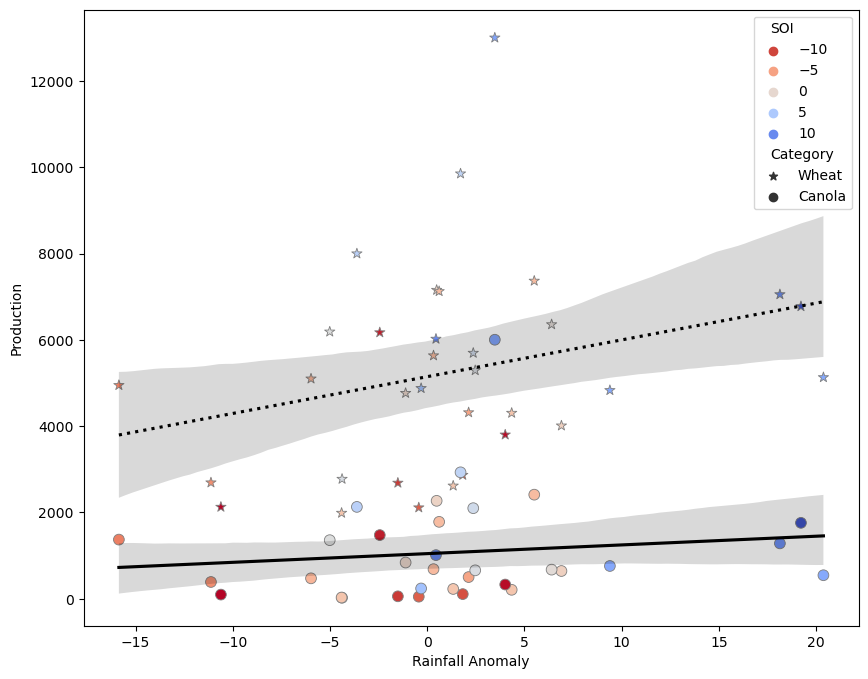

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.colors as mcolors

df = pd.read_csv(r"C:\Users\oscar\Downloads\yearly_data.csv")
def enso(x):
    if x >= 0:
        return "La Nina"
    elif x < 0:
        return "El Nino"
    else:
        return "Neutral"
df["Cycle"] = df["SOI"].apply(enso)
new_df = df.loc[:, ["ABARES: Wheat", "ABARES: Canola", "Rainfall Anomaly", "SOI"]].rename(columns = {"ABARES: Wheat":"Wheat", "ABARES: Canola":"Canola"})
new_df = new_df.melt(id_vars = ["SOI", "Rainfall Anomaly"], value_vars = ["Wheat", "Canola"], value_name = "Production", var_name = "Category")
plt.figure(figsize = (10,8))
sns.scatterplot(data = new_df, x = "Rainfall Anomaly", y = "Production", hue = "SOI", style = "Category", palette = "coolwarm_r", s = 60, markers = {"Wheat":"*","Canola":"o"}, edgecolor = "grey")
sns.regplot(data = new_df[new_df["Category"] == "Wheat"], x = "Rainfall Anomaly", y = "Production", scatter = False, color = "black", line_kws={"ls":":"})
sns.regplot(data = new_df[new_df["Category"] == "Canola"], x = "Rainfall Anomaly", y = "Production", scatter = False, color = "black")